In [1]:
# !jt -l

In [2]:
# !jt -t grade3 -f roboto -fs 12 -cellw 60% -ofs 11 -dfs 11 -T

# 导入库

In [3]:
import baostock as bs
import pandas as pd
from matplotlib import pyplot as plt
from common import *

# class 定义

In [4]:
class StockQuery:
    def __init__(self):
        self.stock_list = pd.DataFrame()
        self.stock = {}
        msg = bs.login()
        if msg.error_msg != 'success':
            print("Bao stock login error, code: {}, msg: {}".format(msg.error_code, msg.error_msg))

    def init(self):
        rs = bs.query_all_stock("2023-9-28")

        self.stock_list = rs.get_data()
        self.stock = {}

    def query(self, code, start=None, end=None) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        start_date = start or '2023-04-01'
        end_date = end or '2023-9-28'

        rs = bs.query_history_k_data(code, 'date,open,high,low,close,volume', start_date=start_date,
                                     end_date=end_date)

        self.stock.update({code: rs.get_data()})
        return self.stock[code]

    def load(self, code) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        file = "./stacks/{}.csv".format(code)
        if code.startswith('b') or not os.path.isfile(file):
            return pd.DataFrame()

        data = pd.read_csv(file)
        self.stock.update({code: data})
        return data

    def load_all(self):
        code_list = self.stock_list['code']
        for code in code_list:
            if code.startswith('b'):
                continue
            data = pd.read_csv("./stacks/{}.csv".format(code))
            self.stock.update({code: data})
        return self.stock

    def query_all(self, start=None, end=None):
        code_list = self.stock_list['code']
        for i in range(code_list.shape[0]):
            data = self.query(code_list[i])
            data.to_csv("./stacks/{}.csv".format(code_list[i]), index=False)

        return self.stock

    def __del__(self):

        # bs.logout()
        pass

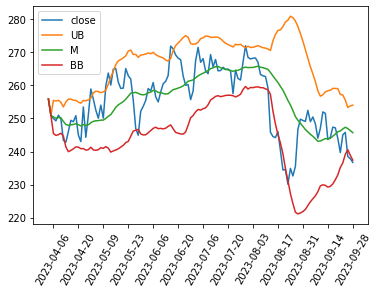

In [5]:
sq = StockQuery()
# sq.init()
data = sq.load('sz.002594')

plt.plot(data['close'], label="close")
plt.xticks(range(len(data['close']))[2::10], data['date'][2::10], rotation=60)
UB, M, BB = BOLL(data.close)
plt.plot(UB, label="UB")
plt.plot(M, label="M")
plt.plot(BB, label="BB")
plt.legend()
plt.show()



In [6]:
sq = StockQuery()
sq.init()
data = sq.load_all()


login success!


In [7]:

factor=0.03
rise1 = set()
for code,data in sq.stock.items():
    if data.shape[0]<1:
        continue
    i = data.shape[0]-1
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise1.add(code)
        
rise2 = set()
for code,data in sq.stock.items():
    if data.shape[0]<2:
        continue
    i = data.shape[0]-2
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise2.add(code)
        
rise3 = set()
for code,data in sq.stock.items():
    if data.shape[0]<3:
        continue
    i = data.shape[0]-3
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise3.add(code)

rise4 = set()
for code,data in sq.stock.items():
    if data.shape[0]<4:
        continue
    i = data.shape[0]-4
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise4.add(code)
        
l1,l2,l3,l4 = [],[],[],[]
for code in rise1:
    if code in rise2:
        if code in rise3:   
            if code in rise4:        
                l4.append(code)
            else :
                l3.append(code)
        else :
            l2.append(code)
    else:
        l1.append(code)
print("\n\n\n")
print(l1)

print("\n\n\n")
print(l2)

print("\n\n\n")
print(l3)   

print("\n\n\n")
print(l4)        





['sz.002886', 'sz.002559', 'sz.300256', 'sh.688272', 'sz.002799', 'sz.301042', 'sh.603023', 'sz.000637', 'sz.002446', 'sz.002388', 'sh.688120', 'sh.603650', 'sh.603813', 'sz.002512', 'sh.600686', 'sz.002214', 'sz.301276', 'sh.688578', 'sh.603666', 'sz.300335', 'sh.600418', 'sz.300752', 'sh.688012', 'sz.000526', 'sh.688667', 'sz.002929', 'sh.600823', 'sz.300816', 'sz.300231', 'sz.002870', 'sz.300976', 'sz.300078', 'sh.603516', 'sh.688027', 'sh.688182', 'sz.300342', 'sz.300897', 'sz.002284', 'sz.002577', 'sh.600071', 'sh.688020', 'sz.002036', 'sz.002456', 'sz.300319', 'sh.600186', 'sh.688510', 'sz.003015', 'sz.301186', 'sz.002574', 'sz.300903', 'sz.300739', 'sz.300473', 'sh.603178', 'sz.300736', 'sz.300538', 'sz.300130', 'sz.002962', 'sz.300536', 'sh.605588', 'sz.300567', 'sz.000985', 'sz.301005', 'sh.600707', 'sh.603380', 'sh.688072', 'sz.002055', 'sz.300050', 'sh.688199', 'sz.002263', 'sz.002669', 'sz.002892', 'sz.300680', 'sz.300909', 'sz.300304', 'sz.002896', 'sz.002436', 'sz.002

In [11]:
have_year_rise = set()
for code,data in sq.stock.items():
    if data.shape[0]<2:
        continue
    i = data.shape[0]
    rise = (data['close'][i-1] - data['close'][0])
    if rise>0:
        have_year_rise.add(code)
print(have_year_rise)

{'sh.600285', 'sz.002886', 'sz.002676', 'sh.601000', 'sz.002563', 'sz.301139', 'sz.300697', 'sh.000150', 'sz.002126', 'sz.002641', 'sz.301070', 'sh.688165', 'sz.001226', 'sz.301222', 'sz.002835', 'sz.000766', 'sz.301399', 'sh.688358', 'sz.001202', 'sz.300331', 'sz.300032', 'sz.300262', 'sz.300197', 'sh.600683', 'sh.600737', 'sh.605298', 'sz.002899', 'sz.002577', 'sz.002973', 'sh.600186', 'sz.002015', 'sz.003015', 'sh.600128', 'sz.300485', 'sz.002536', 'sh.600425', 'sh.600351', 'sh.600060', 'sz.000544', 'sh.603903', 'sz.002221', 'sh.688609', 'sh.603488', 'sh.688017', 'sz.300536', 'sh.605155', 'sh.688538', 'sh.603716', 'sz.301005', 'sh.600612', 'sz.002381', 'sh.600919', 'sh.600750', 'sz.002898', 'sz.001299', 'sz.002007', 'sh.600191', 'sh.600231', 'sh.601138', 'sz.300886', 'sh.600719', 'sz.003023', 'sh.603948', 'sz.002629', 'sh.600601', 'sz.002444', 'sz.300962', 'sh.688195', 'sz.000778', 'sh.603220', 'sz.300371', 'sz.002482', 'sz.301297', 'sz.002820', 'sh.600613', 'sh.600548', 'sz.000932'

In [13]:
month_fall = set()
for code,data in sq.stock.items():
    if data.shape[0]<25:
        continue
    i = data.shape[0]
    rise = (data['close'][i-25] - data['close'][0])
    if rise<0:
        month_fall.add(code)
print(month_fall)

{'sh.603976', 'sh.601615', 'sh.688353', 'sz.002886', 'sz.002676', 'sh.600628', 'sh.688553', 'sz.300539', 'sz.301301', 'sz.002996', 'sz.002192', 'sh.688180', 'sh.688576', 'sz.300256', 'sz.002634', 'sh.000911', 'sh.688362', 'sz.003040', 'sh.603122', 'sh.688522', 'sh.688028', 'sh.600797', 'sz.002446', 'sh.688519', 'sz.301139', 'sz.002061', 'sh.600513', 'sh.688339', 'sh.600773', 'sz.301332', 'sh.688232', 'sz.002388', 'sz.301330', 'sh.000150', 'sz.002255', 'sz.300582', 'sz.399550', 'sz.301237', 'sh.601865', 'sz.002507', 'sh.603978', 'sz.300353', 'sh.688139', 'sz.002344', 'sz.002782', 'sh.000971', 'sh.600418', 'sz.002226', 'sz.002529', 'sh.603980', 'sh.000828', 'sh.603567', 'sz.300196', 'sh.600990', 'sz.002700', 'sz.000898', 'sz.301210', 'sh.688165', 'sz.001226', 'sh.603868', 'sz.301222', 'sh.000139', 'sz.000519', 'sz.002835', 'sz.300513', 'sz.300751', 'sz.301300', 'sz.300341', 'sz.399660', 'sz.002320', 'sz.301119', 'sz.002591', 'sz.001202', 'sh.603100', 'sh.600884', 'sh.000853', 'sh.603866'

In [15]:
in_point = set()
for code in month_fall:
    if code in have_year_rise:
        data = sq.query(code)['close']
        i = data.shape[0]
        if i<3:
            cotinue
        if data[i-1]>data[i-3]:
            in_point.add(code)
print(len(in_point))

438


In [31]:
start_date = "2023-9-27"
end_date = "2023-9-28"

In [ ]:
code = list(in_point)[0]
print(bs.query_balance_data(code,start_date,end_date))

In [41]:
today = "2023-9-28"
bs.login()
gold = set()
for code in in_point:
    rs = bs.query_history_k_data_plus(code,
        "volume,amount,turn,pctChg",
        start_date=today, end_date=today,
        frequency="d", adjustflag="3")
    data = rs.get_data()
    pctChg = float(data['pctChg'][0])
    turn = float(data['turn'][0])

    if pctChg>0.1 and pctChg<5 and turn>4 and turn<11:
        gold.add(code)
print(gold)

login success!
{'sz.301160', 'sz.300538', 'sz.002222', 'sz.300429', 'sz.002886', 'sh.688496', 'sh.688285', 'sz.300403', 'sz.300270', 'sh.688259', 'sh.600203', 'sz.300548', 'sz.300129', 'sz.002465', 'sh.605258', 'sz.300184', 'sz.300905', 'sz.002767', 'sh.603118', 'sh.688166', 'sz.300534', 'sz.300563', 'sz.300731', 'sz.300499', 'sz.301388', 'sz.301107', 'sz.000801', 'sh.603048', 'sz.300374', 'sh.600326', 'sz.300597', 'sh.603439', 'sz.301072', 'sz.301008', 'sh.688418', 'sz.300991', 'sz.300743', 'sz.300514', 'sz.000554', 'sz.002278', 'sz.300084', 'sz.300978', 'sz.300939', 'sh.605598', 'sz.002587', 'sz.301397', 'sz.300163'}


In [42]:
bs.login()
datas = []
for code in gold:
    rs = bs.query_stock_basic(code)
    data = rs.get_data()
    datas.append(data)
print(datas)

login success!
[        code code_name     ipoDate outDate type status
0  sz.301160      翔楼新材  2022-06-06            1      1,         code code_name     ipoDate outDate type status
0  sz.300538      同益股份  2016-08-26            1      1,         code code_name     ipoDate outDate type status
0  sz.002222      福晶科技  2008-03-19            1      1,         code code_name     ipoDate outDate type status
0  sz.300429      强力新材  2015-03-24            1      1,         code code_name     ipoDate outDate type status
0  sz.002886      沃特股份  2017-06-27            1      1,         code code_name     ipoDate outDate type status
0  sh.688496      清越科技  2022-12-28            1      1,         code code_name     ipoDate outDate type status
0  sh.688285      高铁电气  2021-10-20            1      1,         code code_name     ipoDate outDate type status
0  sz.300403      汉宇集团  2014-10-30            1      1,         code code_name     ipoDate outDate type status
0  sz.300270      中威电子  2011-10-12       

In [47]:
for data in datas:
    if data.shape[0]:
        print(data['code_name'][0])

翔楼新材
同益股份
福晶科技
强力新材
沃特股份
清越科技
高铁电气
汉宇集团
中威电子
创耀科技
福日电子
博创科技
泰胜风能
海格通信
协和电子
力源信息
宝丽迪
先锋电子
共进股份
博瑞医药
陇神戎发
神宇股份
科创新源
高澜股份
欣灵电气
瑜欣电子
四川九洲
浙江黎明
中铁装配
西藏天路
吉大通信
贵州三力
中捷精工
宏昌科技
震有科技
创益通
天地数码
友讯达
泰山石油
神开股份
海默科技
东箭科技
秋田微
上海港湾
奥拓电子
先锋新材


In [48]:
print(gold)

{'sz.301160', 'sz.300538', 'sz.002222', 'sz.300429', 'sz.002886', 'sh.688496', 'sh.688285', 'sz.300403', 'sz.300270', 'sh.688259', 'sh.600203', 'sz.300548', 'sz.300129', 'sz.002465', 'sh.605258', 'sz.300184', 'sz.300905', 'sz.002767', 'sh.603118', 'sh.688166', 'sz.300534', 'sz.300563', 'sz.300731', 'sz.300499', 'sz.301388', 'sz.301107', 'sz.000801', 'sh.603048', 'sz.300374', 'sh.600326', 'sz.300597', 'sh.603439', 'sz.301072', 'sz.301008', 'sh.688418', 'sz.300991', 'sz.300743', 'sz.300514', 'sz.000554', 'sz.002278', 'sz.300084', 'sz.300978', 'sz.300939', 'sh.605598', 'sz.002587', 'sz.301397', 'sz.300163'}


In [50]:
code = 'sz.301160'
data = sq.query(code)
close = data['close']
print(close)

0      35.55
1      34.76
2      34.74
3      35.21
4      35.13
       ...  
118    35.53
119    35.56
120    35.36
121    35.64
122    36.20
Name: close, Length: 123, dtype: float64


In [69]:
for code in gold:
    rc =0
    uc = 0
    data = sq.query(code)
    c = data['close']
    for i in range(1,len(c)-4):
        if c[i] > c[i-1]:
            if c[i+1]>c[i]:
                rc +=1
            else:
                uc+=1
    print(code,rc,uc,rc+uc,len(c))
#     if rc > 30:
#         print(code,rc,uc,rc+uc,len(c))
#     print("\n\n")
#     if rc > 30:
#         print(code,rc,uc,rc+uc,len(c))

sz.301160 27 33 60 123
sz.300538 21 35 56 123
sz.002222 26 33 59 123
sz.300429 31 25 56 123
sz.002886 33 27 60 123
sh.688496 25 27 52 123
sh.688285 23 25 48 123
sz.300403 22 31 53 123
sz.300270 21 34 55 123
sh.688259 23 30 53 123
sh.600203 21 30 51 123
sz.300548 36 26 62 123
sz.300129 17 32 49 123
sz.002465 15 36 51 123
sh.605258 30 31 61 123
sz.300184 25 34 59 123
sz.300905 26 29 55 123
sz.002767 27 30 57 123
sh.603118 25 32 57 123
sh.688166 28 26 54 123
sz.300534 21 33 54 123
sz.300563 17 36 53 123
sz.300731 27 35 62 123
sz.300499 25 30 55 123
sz.301388 25 32 57 123
sz.301107 20 35 55 123
sz.000801 20 35 55 123
sh.603048 24 29 53 123
sz.300374 25 32 57 123
sh.600326 26 30 56 123
sz.300597 21 35 56 123
sh.603439 22 36 58 123
sz.301072 31 26 57 123
sz.301008 29 29 58 123
sh.688418 20 34 54 123
sz.300991 25 31 56 123
sz.300743 22 31 53 123
sz.300514 23 31 54 123
sz.000554 25 30 55 123
sz.002278 23 34 57 123
sz.300084 25 29 54 123
sz.300978 26 33 59 123
sz.300939 23 33 56 123
sh.605598 2